In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
 
data = pd.read_csv('/content/gapminder.csv', low_memory=False)
 
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
data['polityscore'] = pd.to_numeric(data['polityscore'], errors='coerce')

In [20]:
binarydata = data.copy()
 
def internetgrp (row):
    if row['internetuserate'] < data['internetuserate'].median():
        return 0
    else:
        return 1

binarydata['internetuserate'] = binarydata.apply (lambda row: internetgrp (row),axis=1)

In [21]:
binarydata_clean = binarydata.dropna()
 
binarydata_clean.dtypes
binarydata_clean.describe()

,incomeperperson,femaleemployrate,internetuserate,polityscore,employrate
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,6706.556978,48.068421,0.453947,3.861842,59.212500
std,9823.592315,14.826857,0.499521,6.245581,10.363802
min,103.775857,12.400000,0.000000,-10.000000,34.900002
25%,560.797158,39.549999,0.000000,-2.000000,51.924999
50%,2225.931019,48.549999,0.000000,7.000000,58.900002
75%,6905.287662,56.050000,1.000000,9.000000,65.000000
max,39972.352770,83.300003,1.000000,10.000000,83.199997


In [23]:
predictors = binarydata_clean[['incomeperperson','employrate','femaleemployrate','polityscore']]
 
targets = binarydata_clean.internetuserate
 
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
 
print ('Training sample')
print (pred_train.shape)
print ('')
print ('Testing sample')
print (pred_test.shape)
print ('')
print ('Training sample')
print (tar_train.shape)
print ('')
print ('Testing sample')
print (tar_test.shape)


Training sample
(91, 4)

Testing sample
(61, 4)

Training sample
(91,)

Testing sample
(61,)


In [24]:
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)
 
predictions=classifier.predict(pred_test)

In [25]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[29,  3],
       [ 6, 23]])

In [26]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8524590163934426

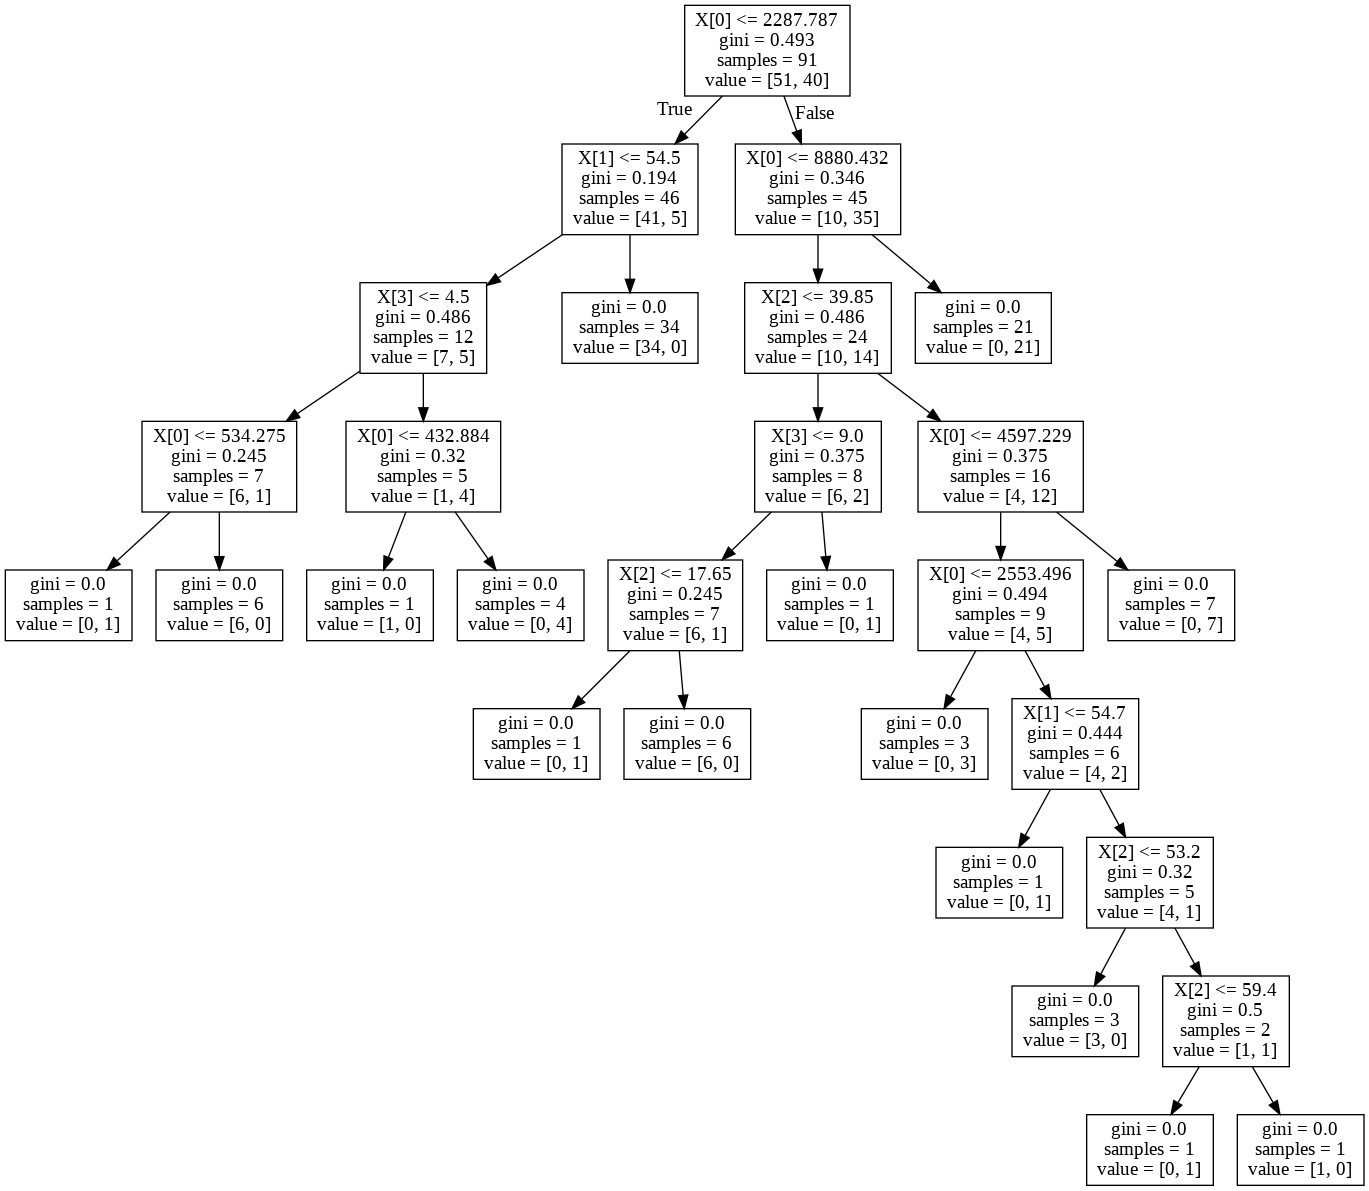

In [27]:
from sklearn import tree
from io import StringIO
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())